In [157]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [176]:
data_path = "/Users/michaelpatsais/Documents/Uni_work/machine_learning/Data/carvana.csv"
save_directory = "/Users/michaelpatsais/Documents/Uni_work/machine_learning/deep-learning-2024/Project2/plots"
df = pd.read_csv(data_path)

In [177]:
def classify_prices(labels):
    bins = [-float('inf'), 20000, 40000, 60000, 80000, 100000, float('inf')]
    labels = pd.cut(labels, bins=bins, labels=[0, 1, 2, 3, 4, 5], include_lowest=True)
    return labels

In [178]:
# Cleaning up data 

# year data is messed up on some lines 
for i, date in enumerate(df["Year"]):
    if len(str(date)) != 4:
        df.drop(i, axis = 0, inplace=True)

# need to turn car names into numeric data
car_names = df["Name"].unique()
car_map = {name : i for i, name in enumerate(car_names)}
df["Name"] = df["Name"].map(car_map)

# turning prices into price ranges for classification
df['Price'] = classify_prices(df['Price'])
labels_class_count = df['Price'].unique().to_list()

print(df)

[0, 1, 2, 3, 4, 5]


/var/folders/mt/7x05255j4y7_nxdmk4xfywjw0000gn/T/ipykernel_68733/462390250.py:16: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  print(df['Price'].unique().to_list())


In [179]:
# defining features and label

features = df.drop(["Price"], axis = 1)

labels = df["Price"]

print(features)
print("---------------")
print(labels)

       Name  Year  Miles
0         0  2018  41946
1         1  2020  45328
2         2  2012  81068
3         3  2019  35372
5         4  2019  47973
...     ...   ...    ...
21995    27  2014  98085
21996   106  2016  62616
21997   118  2013  50345
21998   267  2020  27945
21999    22  2012  70676

[19149 rows x 3 columns]
---------------
0        0
1        1
2        1
3        1
5        0
        ..
21995    0
21996    1
21997    0
21998    1
21999    0
Name: Price, Length: 19149, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]


In [180]:
# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
features, labels = oversampler.fit_resample(features, labels)

print(labels.value_counts())
# print(labels)

Price
0    11627
1    11627
2    11627
3    11627
4    11627
5    11627
Name: count, dtype: int64


In [181]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(features,labels, test_size=0.3)

x_train = np.array(df_x_train).astype(int)

y_train = np.array(df_y_train).astype(int)
y_train = np.expand_dims(y_train, axis = 1)

x_test = np.array(df_x_test).astype(int)

y_test = np.array(df_y_test)
y_test = np.expand_dims(y_test, axis = 1)

# print(x_train, y_train)
# print(len(x_train), len(y_train))
# print(x_test, y_test)
# print(len(x_test), len(y_test))

In [182]:
#  MODEL CONFIGURATION
batch_size = 100
epochs = 100

val_split = 0.2
dropout = 0.25

input_shape = x_train[0].shape
output_nodes = len(labels.value_counts())

model = tf.keras.models.Sequential([

    tf.keras.layers.InputLayer(input_shape=input_shape),

    tf.keras.layers.Dense(128, activation = "leaky_relu"),

    tf.keras.layers.Dense(128, activation = "leaky_relu"),
    tf.keras.layers.Dropout(dropout),

    tf.keras.layers.Dense(64, activation = "leaky_relu"),
    tf.keras.layers.Dropout(dropout),

    tf.keras.layers.Dense(64, activation = "leaky_relu"),
    tf.keras.layers.Dropout(dropout),

    tf.keras.layers.Dense(32, activation = "leaky_relu"),

    tf.keras.layers.Dense(32, activation = "leaky_relu"),
    
    tf.keras.layers.Dense(output_nodes, activation='Softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               512       
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 dropout_22 (Dropout)        (None, 64)               

In [183]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [184]:
history = model.fit(x_train, y_train, validation_split = val_split, batch_size=batch_size, epochs=epochs)

Epoch 1/100


391/391 [==============================] - 1s 2ms/step - loss: 32.6733 - accuracy: 0.2609 - val_loss: 1.3181 - val_accuracy: 0.4935
Epoch 2/100
391/391 [==============================] - 1s 2ms/step - loss: 2.5725 - accuracy: 0.3159 - val_loss: 1.2839 - val_accuracy: 0.4213
Epoch 3/100
391/391 [==============================] - 1s 2ms/step - loss: 1.8495 - accuracy: 0.3655 - val_loss: 1.2005 - val_accuracy: 0.4337
Epoch 4/100
391/391 [==============================] - 1s 2ms/step - loss: 1.5660 - accuracy: 0.4072 - val_loss: 1.1530 - val_accuracy: 0.4992
Epoch 5/100
391/391 [==============================] - 1s 2ms/step - loss: 1.4525 - accuracy: 0.4292 - val_loss: 1.1267 - val_accuracy: 0.4851
Epoch 6/100
391/391 [==============================] - 1s 2ms/step - loss: 1.3007 - accuracy: 0.4607 - val_loss: 1.0492 - val_accuracy: 0.5594
Epoch 7/100
391/391 [==============================] - 1s 2ms/step - loss: 1.2156 - accuracy: 0.4760 - val_loss: 1.0438 - val_accuracy: 0.4698
Epoch 8/10

  N(Epochs)        =  100
  accuracy (train) =  [0.26091742515563965, 0.3159013092517853, 0.3654840588569641, 0.40723392367362976, 0.4292479455471039, 0.4607331156730652, 0.47598934173583984, 0.4881994426250458, 0.49513643980026245, 0.5135923624038696, 0.5190190672874451, 0.5278759002685547, 0.5304868817329407, 0.5366047024726868, 0.5416474938392639, 0.5435672998428345, 0.5530384182929993, 0.5481492877006531, 0.5584395527839661, 0.5617928504943848, 0.5757436156272888, 0.5737214088439941, 0.5834485292434692, 0.5766395330429077, 0.593533992767334, 0.5967593193054199, 0.6038755178451538, 0.6125786900520325, 0.6240465044975281, 0.6227921843528748, 0.6408641934394836, 0.6492090225219727, 0.6537142395973206, 0.6705831289291382, 0.6706855297088623, 0.6854041814804077, 0.6831259727478027, 0.6891414523124695, 0.6934162974357605, 0.7014283537864685, 0.7017611265182495, 0.7092100381851196, 0.7075973749160767, 0.7131521105766296, 0.7078021764755249, 0.7156862616539001, 0.7187836170196533, 0.718041

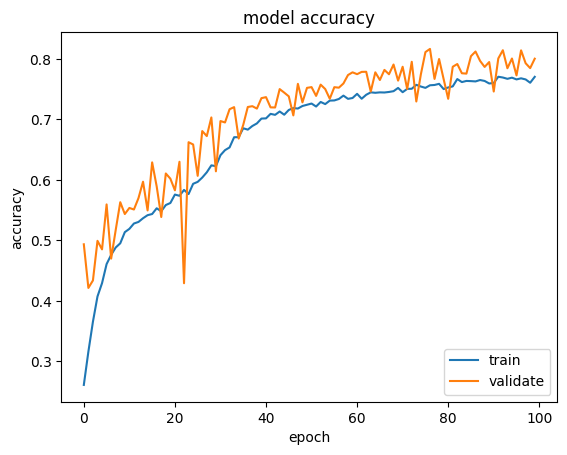

  loss (train)     =  [32.67326736450195, 2.572540760040283, 1.8494813442230225, 1.566014051437378, 1.4524515867233276, 1.3007285594940186, 1.215603232383728, 1.166434645652771, 1.1262186765670776, 1.0753670930862427, 1.0606013536453247, 1.034776210784912, 1.0137441158294678, 1.0062642097473145, 0.9944043159484863, 0.9757015705108643, 0.9509283900260925, 0.9586244225502014, 0.9364668726921082, 0.9232553839683533, 0.8942776918411255, 0.8974726796150208, 0.8846953511238098, 0.900570809841156, 0.8601392507553101, 0.861248254776001, 0.8564429879188538, 0.8329394459724426, 0.818022608757019, 0.8235496878623962, 0.7914799451828003, 0.7779339551925659, 0.7724178433418274, 0.7468670010566711, 0.7449714541435242, 0.7238029837608337, 0.7236773371696472, 0.7068678140640259, 0.699885368347168, 0.6839340925216675, 0.6790109872817993, 0.6658714413642883, 0.6617592573165894, 0.6595418453216553, 0.6710288524627686, 0.6480562686920166, 0.6470932364463806, 0.6429399847984314, 0.6306954622268677, 0.63135

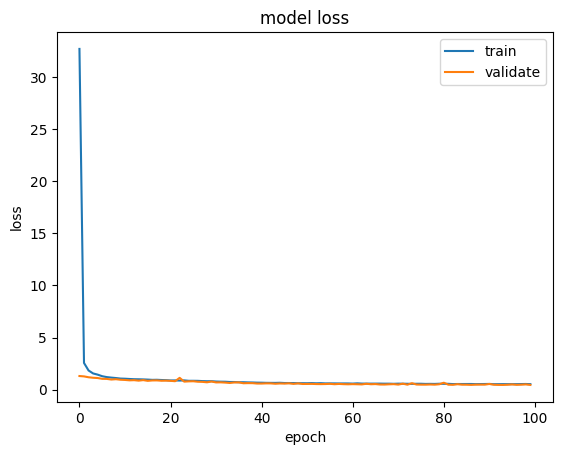

In [185]:
# look at the history
plt.plot(history.history['accuracy'], label = "Train") # 'loss'
plt.plot(history.history['val_accuracy'], label = "Validate") # 'val_loss'
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
# plt.savefig(save_directory + "MLP_CLS_ModelAccuracy.png")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], label = "Train") # 'loss'
plt.plot(history.history['val_loss'], label = "Validate") # 'val_loss'
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
# plt.savefig(save_directory + "MLP_CLS_ModelLoss.png")
plt.show()

In [186]:
predictions = model.predict(x_test)

655/655 [==============================] - 0s 436us/step


In [191]:
predictions_list = [np.argmax(prediction) for prediction in predictions]

pred_df=pd.DataFrame({'Car Name':df_x_test['Name'],'Actual Value':np.concatenate(y_test),'Predicted Value':predictions_list})
print(pred_df)

       Car Name  Actual Value  Predicted Value
4728         90             1                2
63070       285             5                5
8129         87             1                1
7394        122             0                0
6613         60             0                1
...         ...           ...              ...
52812       237             4                4
29981       233             2                2
37351       216             3                3
34030        87             2                1
68639       285             5                5

[20929 rows x 3 columns]


/var/folders/mt/7x05255j4y7_nxdmk4xfywjw0000gn/T/ipykernel_68733/3597359915.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_val = int(sample[1][1])
/var/folders/mt/7x05255j4y7_nxdmk4xfywjw0000gn/T/ipykernel_68733/3597359915.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_val = int(sample[1][2])


[2546, 2059, 1861, 3293, 3445, 3465]
[910, 1498, 1556, 296, 0, 0]


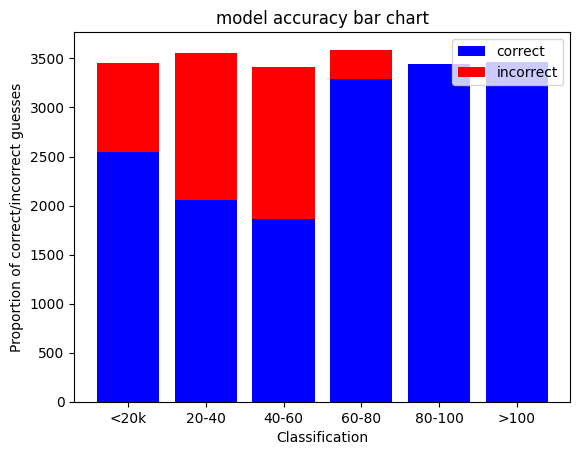

In [197]:
classifications = [[] for _ in range(len(labels_class_count))]

for sample in pred_df.iterrows(): # for each image, its label and prediction are stored in variables

    true_val = int(sample[1][1])
    pred_val = int(sample[1][2])

    if true_val == pred_val: #if the variables match, the list of the classification will be appended by a correct/incorrect 
        classifications[true_val].append("correct")
    else:
        classifications[true_val].append("incorrect")

correct = [classification.count("correct") for classification in classifications] #for each classification list, the number of correct predictions are stored 
incorrect = [classification.count("incorrect") for classification in classifications] #for each classification list, the number of incorrect predictions are stored

print(correct)
print(incorrect)

# x_axis = np.arange(len(classifications))
x_axis = ['<20k', '20-40', '40-60', '60-80', '80-100', '>100']

# plotting the correcct/incorrect amounts per classification as a bar chart
plt.figure()
plt.bar(x_axis, correct, color = "blue", label = "correct")
plt.bar(x_axis, incorrect, bottom = correct, color = "red", label = "incorrect")
plt.title('model accuracy bar chart')
plt.ylabel('Proportion of correct/incorrect guesses')
plt.xlabel('Classification')
plt.xticks(range(len(classifications)))
plt.legend(loc='upper right')
# plt.savefig(save_directory + "MLP_CLS_ModelAccuracyBar.png")
plt.show()

AttributeError: 'Axes' object has no attribute 'set_legend'

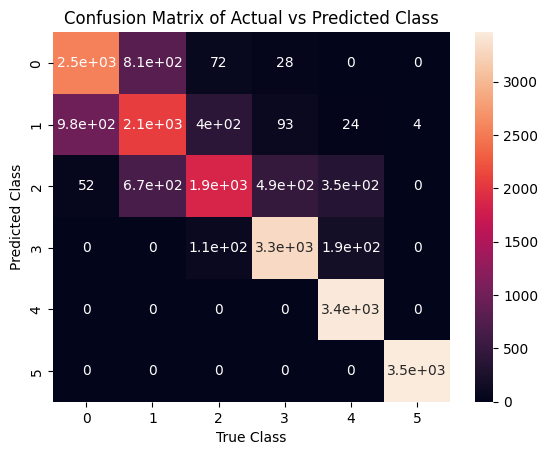

In [199]:
cm = confusion_matrix(pred_df["Actual Value"], pred_df["Predicted Value"])
ax = sns.heatmap(cm, annot = True)
ax.set_title('Confusion Matrix of Actual vs Predicted Class')
ax.set_ylabel('Predicted Class')
ax.set_xlabel('True Class')
# plt.savefig(save_directory + "MLP_CLS_ConfusionMatrix.png")
plt.show()

/var/folders/mt/7x05255j4y7_nxdmk4xfywjw0000gn/T/ipykernel_68733/965595621.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_val = int(sample[1][1])
/var/folders/mt/7x05255j4y7_nxdmk4xfywjw0000gn/T/ipykernel_68733/965595621.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_val = int(sample[1][2])
/var/folders/mt/7x05255j4y7_nxdmk4xfywjw0000gn/T/ipykernel_68733/965595621.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

[42, 18, 6, 38, 37, 112, 20, 4, 7, 5, 5, 201, 10, 37, 8, 29, 53, 13, 12, 123, 21, 97, 129, 126, 4, 21, 59, 149, 65, 29, 81, 27, 129, 13, 32, 82, 19, 3, 32, 100, 13, 31, 11, 7, 14, 81, 46, 42, 21, 16, 3, 40, 3, 37, 12, 4, 40, 29, 19, 52, 585, 55, 14, 64, 4, 35, 312, 6, 2, 1, 15, 18, 80, 27, 18, 11, 10, 1, 13, 11, 35, 76, 4, 85, 22, 10, 2, 122, 28, 8, 34, 0, 28, 171, 35, 12, 4, 33, 77, 1, 1, 26, 112, 7, 5, 20, 23, 4, 2, 8, 3, 4, 112, 0, 5, 7, 42, 15, 7, 0, 8, 11, 19, 22, 14, 0, 14, 7, 78, 10, 6, 66, 34, 2, 1, 50, 3, 25, 6, 7, 7, 4, 10, 50, 0, 3, 1, 9, 2, 1, 1, 6, 4, 5, 6, 25, 5, 2, 14, 3, 0, 4, 19, 0, 7, 5, 4, 2, 4, 5, 2, 0, 14, 0, 87, 4, 3, 23, 1, 94, 5, 96, 1, 0, 0, 0, 0, 26, 143, 2, 1, 1, 23, 0, 0, 0, 0, 2, 0, 0, 6, 16, 1, 1, 0, 1, 0, 0, 45, 89, 0, 110, 0, 0, 0, 3, 309, 0, 1, 0, 1, 0, 0, 15, 0, 0, 1225, 0, 1, 1, 21, 1, 0, 623, 16, 0, 677, 1385, 190, 52, 0, 0, 0, 60, 0, 90, 47, 0, 0, 191, 0, 0, 50, 29, 10, 0, 0, 0, 25, 0, 363, 9, 0, 36, 0, 0, 0, 0, 86, 16, 12, 8, 46, 0, 0, 9, 10, 0, 0,

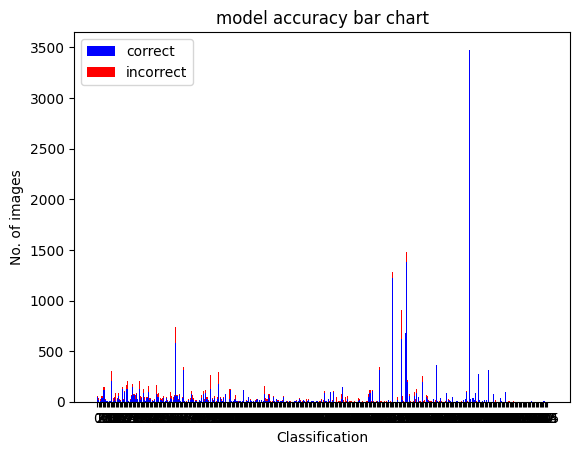

In [189]:
#work out accruacy

classifications = [[] for _ in range(len(car_names))] # creating an empty list for each classification, to store correct/incorrect predictions

for sample in pred_df.iterrows(): # for each image, its label and prediction are stored in variables

    true_val = int(sample[1][1])
    pred_val = int(sample[1][2])

    index = int(sample[1][0])

    if true_val == pred_val: #if the variables match, the list of the classification will be appended by a correct/incorrect 
        classifications[index].append("correct")
    else:
        classifications[index].append("incorrect")

correct = [classification.count("correct") for classification in classifications] #for each classification list, the number of correct predictions are stored 
incorrect = [classification.count("incorrect") for classification in classifications] #for each classification list, the number of incorrect predictions are stored

print(correct)
print(incorrect)

x_axis = np.arange(len(classifications))

# plotting the correcct/incorrect amounts per classification as a bar chart
plt.figure()
plt.bar(x_axis, correct, color = "blue")
plt.bar(x_axis, incorrect, bottom = correct, color = "red")
plt.title('model accuracy bar chart')
plt.ylabel('No. of images')
plt.xlabel('Classification')
plt.xticks(range(len(classifications)))
plt.legend(['correct', 'incorrect'], loc='upper left')
# plt.savefig(save_directory + "/2c_accuracy_bar.png")
plt.show()

# # calculating accuracy percentage per class
# accuracy_perc = []

# for correct_count, incorrect_count in zip(correct, incorrect):
#     total = correct_count+incorrect_count
#     if total > 0:
#         acc = correct_count/total
#     else: 
#         acc = 0 
#     accuracy_perc.append(acc)

# plt.plot(accuracy_perc)
# plt.title('model accuracy percentage')
# plt.ylabel('Accuracy Percentage')
# plt.xlabel('Classification')
# plt.xticks(range(len(classifications)))
# # plt.savefig(save_directory + "/2c_accuracy_perc.png")
# plt.show()

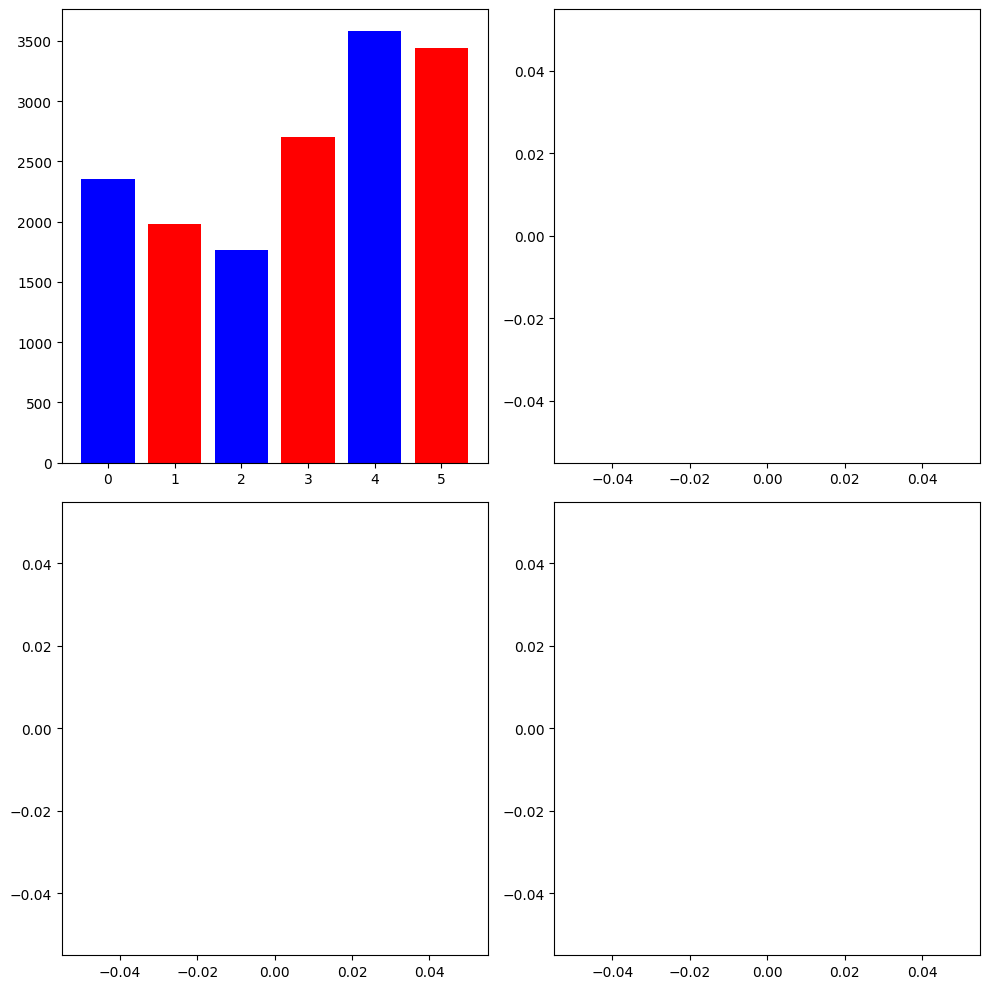

In [154]:
combined_class_acc = zip(correct, incorrect)


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

correct_list = [correct[:86], correct[86:172], correct[86:172], correct[172:]]

incorrect_list = [incorrect[:86], incorrect[86:172], incorrect[86:172], incorrect[172:]]


# Plotting the correcct/incorrect amounts per classification as a bar chart
for i in range(4):
    ax = axes[i//2, i%2] # calculating the subplot to print to

    x_axis = np.arange(len(correct_list[i]))

    ax.bar(x_axis, correct_list[i], color=['blue', 'red'])
    ax.bar(x_axis, incorrect_list[i], color=['blue', 'red'])


plt.tight_layout()
plt.show()
